# Logistic regression - Supervised Learning

# Dataset:
Personal Loan Campaign

# Objective
The classification goal is to predict the likehood of a liability customer buying personal loans

# 1. Import the datasets and Libraries
check datatype, statistical summary, shape, null values or incorrect imputation

In [1]:
#Load Libraries 
import pandas as pd              # data processing
import numpy as np               # linear algebra
import matplotlib.pyplot as plt  # plots data
import seaborn as sns            # plots data
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
#%matplotlib qt   

# Remove scientific notations and display numbers with 2 decimal points instead
#pd.options.display.float_format = '{:,.2f}'.format

In [2]:
#load data in excel
cust_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

<p style="color:blue;">1.1  Check Data Type, shape & Information </p>

In [3]:
#checking data type
type(cust_df)

pandas.core.frame.DataFrame

In [4]:
# dimention data
cust_df.shape

(5000, 14)

In [5]:
# Data information
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


data shows 5000 user and 14 personal and banking information

<p style="color:blue;">1.2 Statistical Information </p>

In [6]:
# Statistical information
cust_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Data needs to check. Min. Experience, Min Income, Min ZIP Code

<p style="color:blue;">1.3  Null values or incorrect imputation </p>

In [7]:
# null values in data set
#cust_df.isna().sum()      # isna or isnull gives the same results 
cust_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<p style="color:red;">1.3.1  Correcting the Users with Negative years of experience </p>

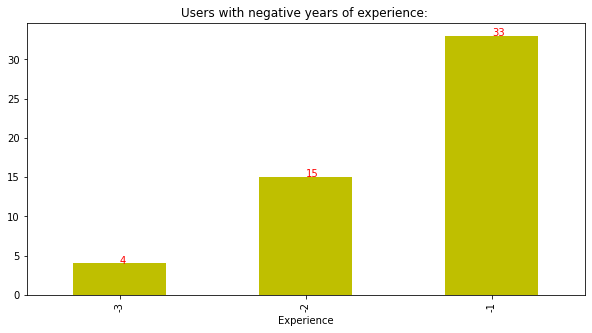

In [8]:
# Checking how many users have negative Experience
cust_neg_exp = cust_df[cust_df.Experience<0].groupby('Experience').ID.count()
cust_neg_exp.plot(kind='bar', title='Users with negative years of experience: ', color='y', figsize=(10,5))
for i, v in enumerate(cust_neg_exp):
    plt.text(i, v, int(v),color='r')

There are 52 users with negative years of experience: 4 have -3 years, 15 have -2 years, and 33 have -1 year. 

In [9]:
# After anaylizing the data, I'm correcting the negative to positive values

cust_df.Experience = cust_df.Experience.abs()

<p style="color:red;">1.3.2  Correcting the Min ZIP Code area </p>

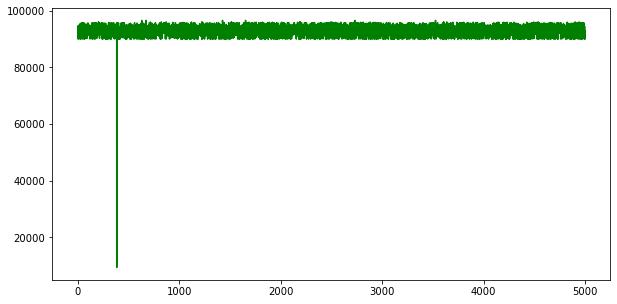

In [10]:
# Identifying ZIP Code in a plot
cust_df['ZIP Code'].plot(color='g',figsize=(10,5));

In [11]:
#cust_df['ZIP Code']
cust_df['ZIP']=cust_df['ZIP Code'].astype(str).apply(lambda x: len(x) ) # axis =1 apply function to each row
cust_df[cust_df['ZIP']!=5]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,ZIP
384,385,51,25,21,9307,4,0.6,3,0,0,0,0,1,1,4


In [12]:
# adding zero on the ZIP Code
cust_df['ZIP']=cust_df['ZIP Code'].astype(str).apply(lambda x: x+'0' if len(x)!=5 else x ).astype('int64')

In [13]:
#Analysing zip code
print('Min ZIP Code:', cust_df['ZIP'].min(),'\n' 'Max ZIP Code :', cust_df['ZIP'].max())

Min ZIP Code: 90005 
Max ZIP Code : 96651


The ZIP Code range is for the State of California

<p style="color:red;">1.3.3  Checking Min Income </p>

Text(0, 0.5, 'Income $')

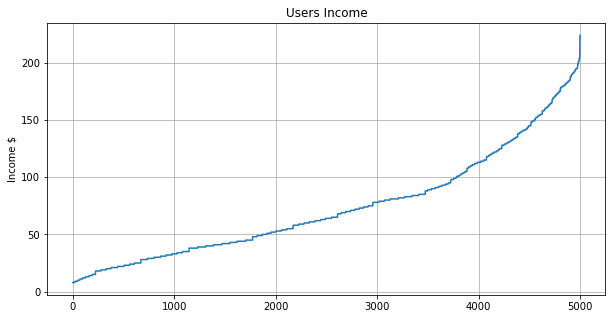

In [14]:
# Users Income
cust_df.Income.sort_values(ignore_index=True).plot(figsize=(10,5)).grid()
plt.title('Users Income')
plt.ylabel ('Income $')

Data Income looks ok 

# 2. EDA: Study the data distribution in each attribute and target variable
Share your findings

<p style="color:blue;">2.1 Number of Unique in each colum</p>

In [15]:
# Number of unique in each column
cust_df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
ZIP                    467
dtype: int64

number of unique elements for ID is the same of the data size 5,000. No ID was duplicated

<p style="color:blue;">2.2 Number of people with zero mortage & zero credit card spending </p>

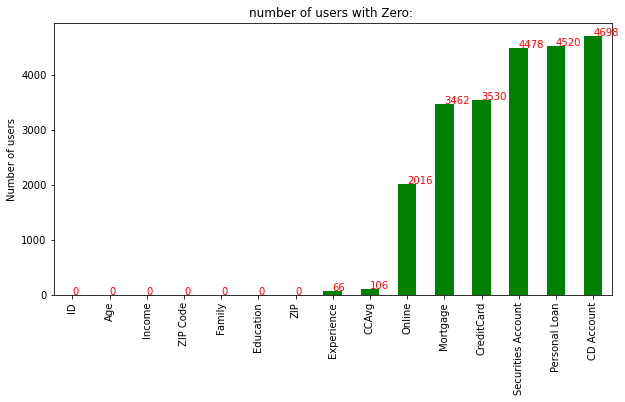

In [16]:
# number of Customers with zero: Experience, CCAvg, online, Mortgage, CreditCard, SA, PL, & CD Ac 
cust_z =cust_df[cust_df==0].count().sort_values()
cust_z.plot(kind='bar', title='number of users with Zero: ', color='g', figsize=(10,5))
plt.ylabel('Number of users')
for i, v in enumerate(cust_z):
    plt.text(i, v, int(v),color='r')

In [17]:
#Number of people with zero mortage
cust_df.Mortgage[cust_df.Mortgage==0].count()   

3462

from 5000 users 3462 users have zero mortgage

In [18]:
#Number of people with zero credit card spending per month
cust_df.CCAvg[cust_df.CCAvg==0].count()  

106

from 5000 users 106 users have not credit card spending

In the fig. above, from 5000 users. 66 have no Experience, 2016 have not Online banking, 3530 have not CreditCard, 
                 4478 have not Sec. Acc, 4520 have not Personal loan, 4698 have not CD Account


<p style="color:blue;">2.3  Value counts of all categorical columns </p>

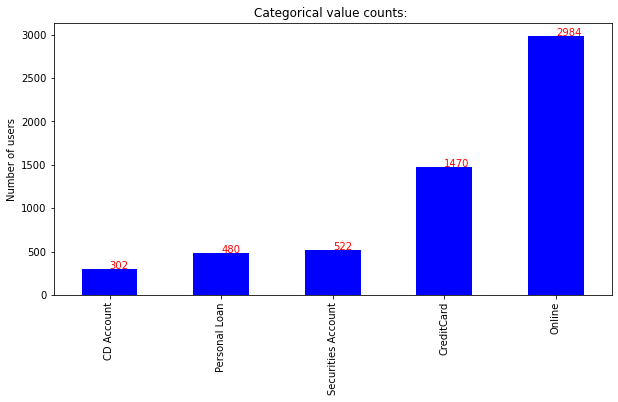

In [19]:
# Value counts of all categorical columns
cust_cat =cust_df.iloc[:,-6:-1][cust_df>0].count().sort_values()
cust_cat.plot(kind='bar', title='Categorical value counts: ', color='b', figsize=(10,5))
plt.ylabel('Number of users')
for i, v in enumerate(cust_cat):
    plt.text(i, v, int(v),color='r')

from 5000 users, only: 302 has CD Account, 480 has Personal Loan, 522 has Sec. Acc, 1470 has CreditCard, & 2984 has Online Banking 

<p style="color:blue;">2.4  Univariante & Bivariante </p>

<p style="color:red;">2.4.6 Data Exploration </p>

0    4520
1     480
Name: Personal Loan, dtype: int64


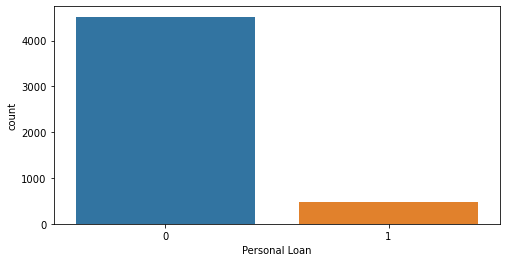

In [20]:
# Exploring result data dependency of the variables
print(cust_df['Personal Loan'].value_counts())
plt.figure(figsize=(8,4))
sns.countplot(x='Personal Loan', data=cust_df);

In [21]:
y_pl=len(cust_df.loc[cust_df['Personal Loan']==1])
n_pl=len(cust_df.loc[cust_df['Personal Loan']==0])
print("Percent of approved Personal Loan : {0} ({1:2.2f}%)".format(y_pl, (y_pl / (y_pl + n_pl)) * 100 ))
print("Percent of No approal Personal Loan : {0} ({1:2.2f}%)".format(n_pl, (n_pl / (n_pl + y_pl)) * 100))

Percent of approved Personal Loan : 480 (9.60%)
Percent of No approal Personal Loan : 4520 (90.40%)


Less than 10% of the user have benn approved for Personal Loan

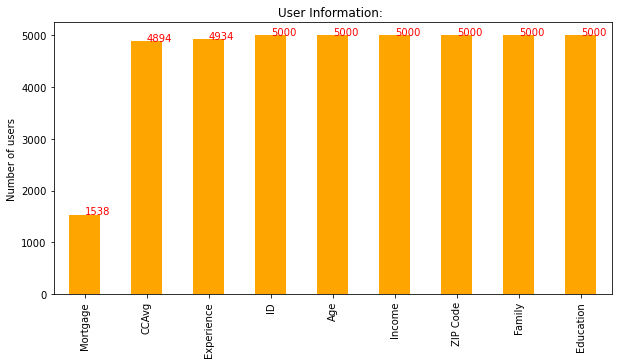

In [22]:
# Value counts of all columns
cust_cat =cust_df.iloc[:,:9][cust_df>0].count().sort_values()
cust_cat.plot(kind='bar', title='User Information: ', color='orange', figsize=(10,5))
plt.ylabel('Number of users')
for i, v in enumerate(cust_cat):
    plt.text(i, v, int(v),color='r')

From 5000 users: 1538 have mortage, 4894 have CCAvg, 4934 have Experience, and all 5000 have some income

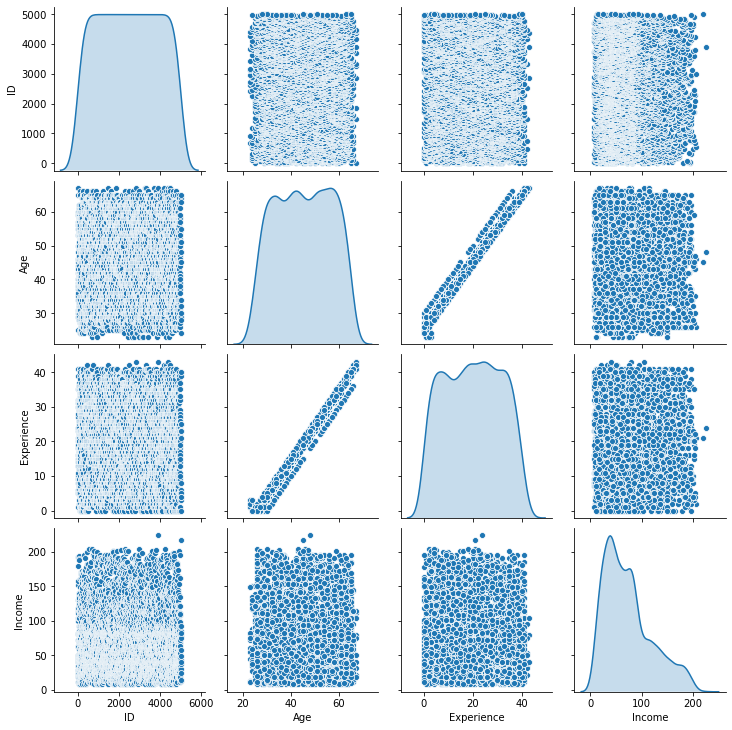

In [23]:
sns.pairplot(cust_df.iloc[:,0:4],diag_kind='kde')

<p style="color:red;">2.4.1  Analysing Experiece Vs Age </p>

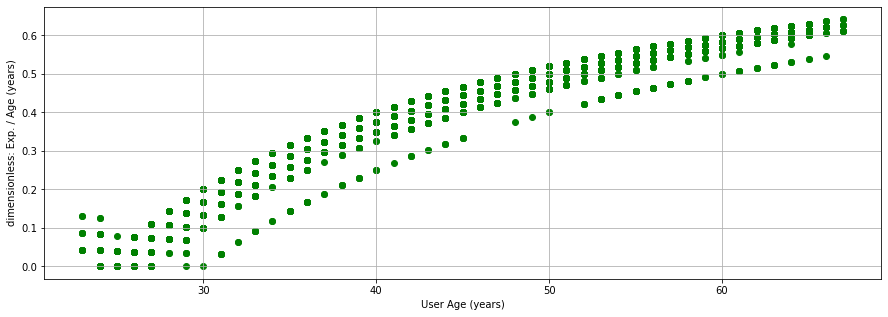

In [24]:
# I'll use adimentional data Experience/Age
cust_df['exp_age'] = cust_df['Experience']/cust_df['Age']
plt.figure(figsize=(15,5))
plt.scatter('Age','exp_age',data=cust_df, color='g')
plt.grid()
plt.ylabel('dimensionless: Exp. / Age (years)')
plt.xlabel('User Age (years)')
plt.show()

There is a direct correlation between years of experience and Age

Text(0.5, 0, 'Year of Experience / Age (years)')

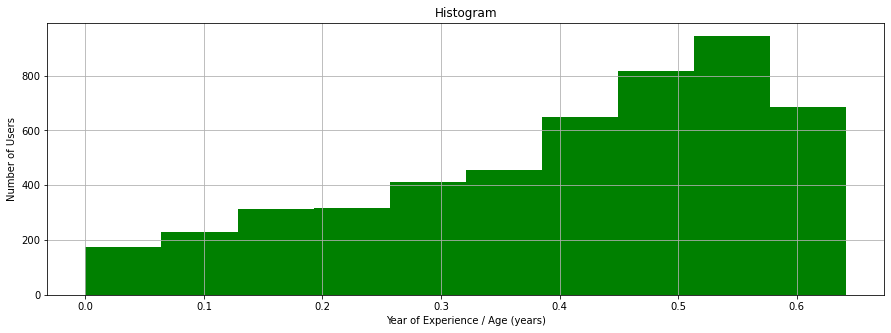

In [25]:
cust_df['exp_age'].hist(stacked=False, bins=10, figsize=(15,5), color='g');
plt.title('Histogram')
plt.ylabel('Number of Users')
plt.xlabel('Year of Experience / Age (years)')
# for i, v in enumerate(cust_df['exp_age']):
#     plt.text(i, v, int(v),color='r')
# plt.show()

when the correlation 'Year of Experience / Age' > 0.5 means the user has already worked more than half of his life

In [26]:
exp_mean = round(cust_df['exp_age'].mean(),2)
print('Total Users avg. years of experience and Age ratio :',exp_mean)

Total Users avg. years of experience and Age ratio : 0.4


In [27]:
# Clasifying users depending of their mortgage/income ratio
cust_df['exp_age_tab']=round(cust_df['exp_age'],1)                   # add column with one decimal for classification
exp_tab = pd.crosstab(index=cust_df['exp_age_tab'],                      # Make a crosstab
                     columns=cust_df['Personal Loan'])                  # Name the count column
exp_tab

Personal Loan,0,1
exp_age_tab,,
0.0,158,15
0.1,316,37
0.2,455,56
0.3,500,65
0.4,875,75
0.5,1183,128
0.6,1033,104


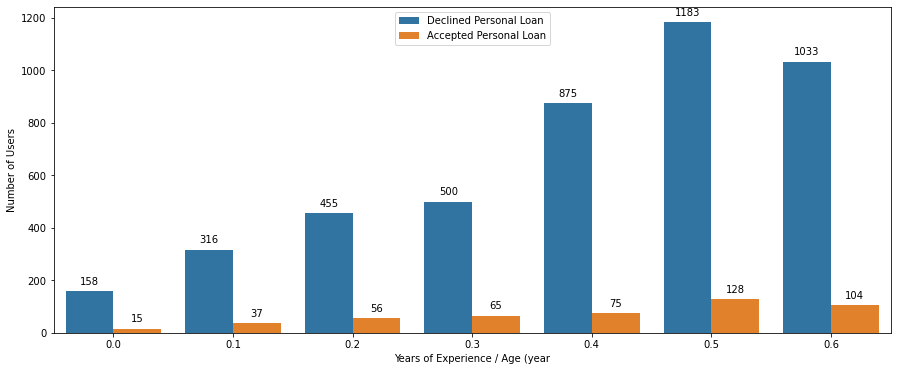

In [28]:
# plotting personal loan approved by Years of Experience/Age ratio
plt.figure(figsize=(15,6))                                             # setting the figure size
ax = sns.countplot(x="exp_age_tab",data=cust_df, hue='Personal Loan')
plt.xlabel('Years of Experience / Age (year')
plt.ylabel('Number of Users')
ax.legend(['Declined Personal Loan', 'Accepted Personal Loan'],loc='upper center')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                      va = 'center', xytext = (0, 10), textcoords = 'offset points')

There is a direct relation between personal loan and years of experience/years ratio

<p style="color:red;">2.4.2  Analysing CCAvg Vs Income </p>

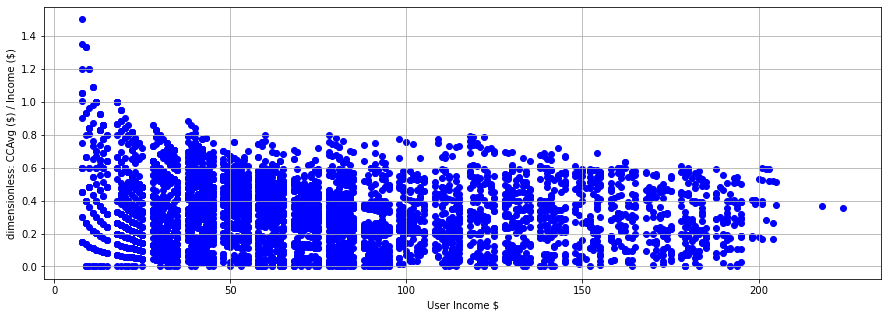

In [29]:
# CreditCard Avg. spending will be convert from months to years
cust_df['CCAvg'] = cust_df['CCAvg']*12     
cust_df['cca_inc'] = cust_df['CCAvg']/cust_df['Income']  # correlation CCAvg Vs Income 
plt.figure(figsize=(15,5))
plt.scatter('Income','cca_inc',data=cust_df, color='b')
plt.grid()
plt.ylabel('dimensionless: CCAvg (\$) / Income (\$)')
plt.xlabel('User Income $')
plt.show()

some users spent more money than they made in the year

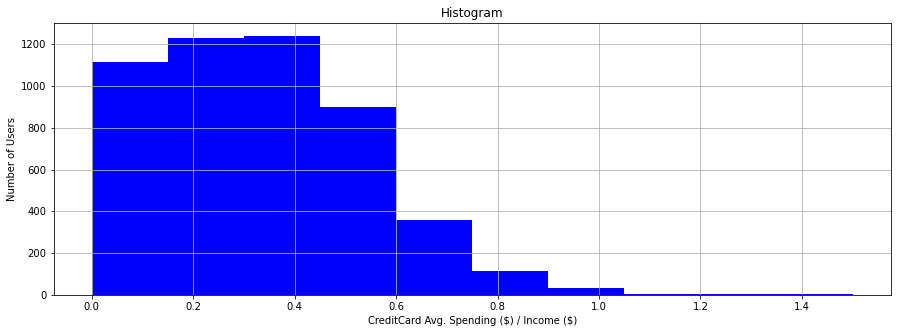

In [30]:
#Histogram
cust_df['cca_inc'].hist(stacked=False, bins=10, figsize=(15,5),color='b');
plt.title('Histogram')
plt.ylabel('Number of Users')
plt.xlabel('CreditCard Avg. Spending (\$) / Income (\$)')
plt.show()

In [31]:
# Average anual spending of the users
av_sp = round(cust_df['cca_inc'].median()*100,2)
print('User CreditCard Avg anual spend is :',av_sp, '%', 'of their anual income')

User CreditCard Avg anual spend is : 31.71 % of their anual income


In [32]:
# clasifying users depending of their CCAvg./income ratio
cust_df['cca_inc_tab']=round(cust_df['cca_inc'],1)           # add column constraining to 1 decimal for classification
cca_tab = pd.crosstab(index=cust_df['cca_inc_tab'],          # Make a crosstab
                     columns=cust_df['Personal Loan'])       # Name the count column
cca_tab

Personal Loan,0,1
cca_inc_tab,,
0.0,349,30
0.1,675,62
0.2,734,69
0.3,777,77
0.4,725,100
0.5,554,90
0.6,357,52
0.7,195,0
0.8,94,0


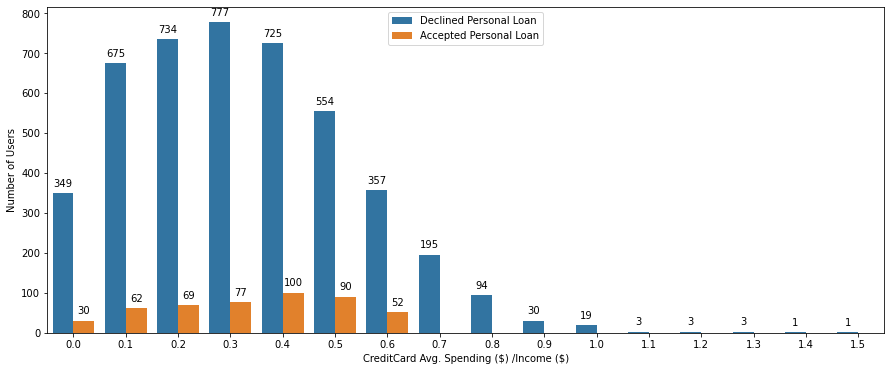

In [33]:
# plotting personal loan approved by CreditCard Avg. Spending/income ratio
plt.figure(figsize=(15,6))                                             # setting the figure size
ax = sns.countplot(x="cca_inc_tab",data=cust_df, hue='Personal Loan')
plt.xlabel('CreditCard Avg. Spending (\$) /Income (\$)')
plt.ylabel('Number of Users')
ax.legend(['Declined Personal Loan', 'Accepted Personal Loan'],loc='upper center')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                      va = 'center', xytext = (0, 10), textcoords = 'offset points')

By the table and figure above. Users does not have personal loand when their CCAvg spent is more than 70% of their annual income. There is a potentional by personal loans for users with lower CreditCard Avg spending. 

<p style="color:red;">2.4.3  Analysing Mortgage Vs Income </p>

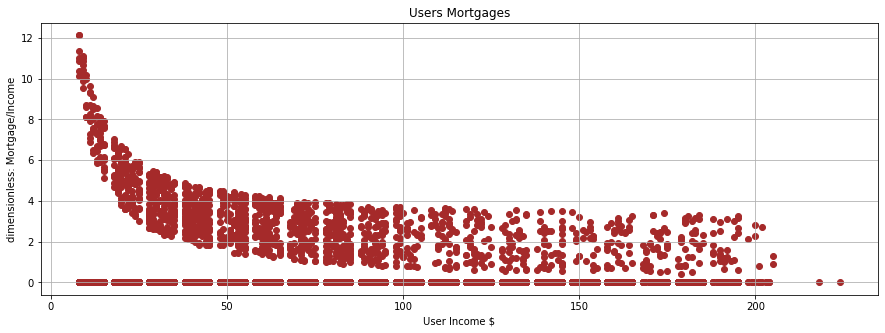

In [34]:
# CreditCard Avg. spending will be convert from months to years
cust_df['mor_inc'] = cust_df['Mortgage']/cust_df['Income']  # correlation CCAvg Vs Income 
plt.figure(figsize=(15,5))
plt.scatter('Income','mor_inc',data=cust_df, color='brown')
plt.title('Users Mortgages')
plt.grid()
plt.ylabel('dimensionless: Mortgage/Income')
plt.xlabel('User Income $')
plt.show()

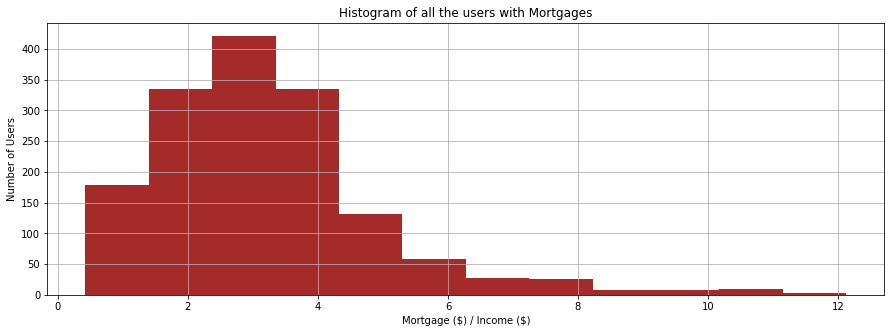

In [35]:
#Histogram
#cust_df['mor_inc'].hist(stacked=False, bins=100, figsize=(15,5),color='brown');
cust_df['mor_inc'][cust_df['mor_inc']>0].hist(stacked=False, bins=12, figsize=(15,5),color='brown');
plt.title('Histogram of all the users with Mortgages')
plt.ylabel('Number of Users')
plt.xlabel('Mortgage (\$) / Income (\$)')
plt.show()

In [36]:
# Average Mortgage of the users
av_mo = round(cust_df['mor_inc'][cust_df['mor_inc']>0].median(),2)
print('Total Users Average Mortgage is :',av_mo, 'times', 'of their anual income')

Total Users Average Mortgage is : 2.95 times of their anual income


In [37]:
# Clasifying users depending of their mortgage/income ratio
cust_df['mor_inc_int']=cust_df['mor_inc'].astype(int)                   # add column as integer
mor_tab = pd.crosstab(index=cust_df['mor_inc_int'],                      # Make a crosstab
                     columns=cust_df['Personal Loan'])                  # Name the count column
mor_tab

Personal Loan,0,1
mor_inc_int,,
0,3198,340
1,242,62
2,358,49
3,372,29
4,176,0
5,82,0
6,33,0
7,22,0
8,16,0


There are users which mortgage is 12 times their anual income

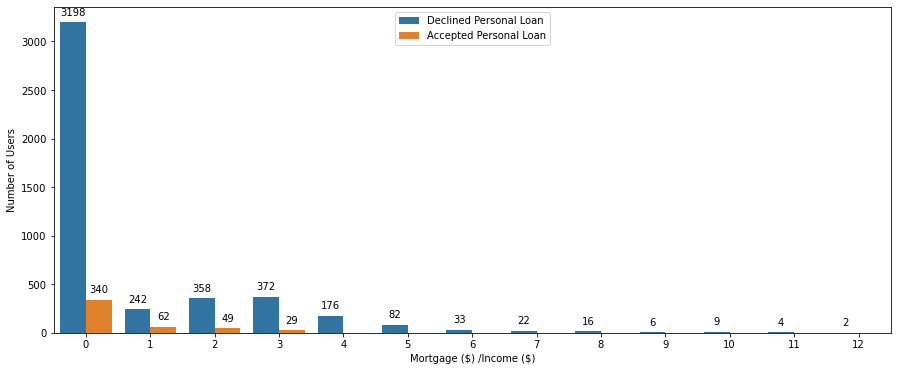

In [38]:
# plotting personal loan approved by mortgage/income ratio
plt.figure(figsize=(15,6))                                             # setting the figure size
ax = sns.countplot(x="mor_inc_int",data=cust_df, hue='Personal Loan')
plt.xlabel('Mortgage (\$) /Income (\$)')
plt.ylabel('Number of Users')
ax.legend(['Declined Personal Loan', 'Accepted Personal Loan'],loc='upper center')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                      va = 'center', xytext = (0, 10), textcoords = 'offset points')

from the crosstab and figure above. 340 users with mortgage less than annual income have personal loan and users which mortgage is over 4 times the annual income does not have personal loan. There is an inverse relation between personal loan and mortgage.

<p style="color:red;">2.4.4  Analysing Education Vs Family Size </p>

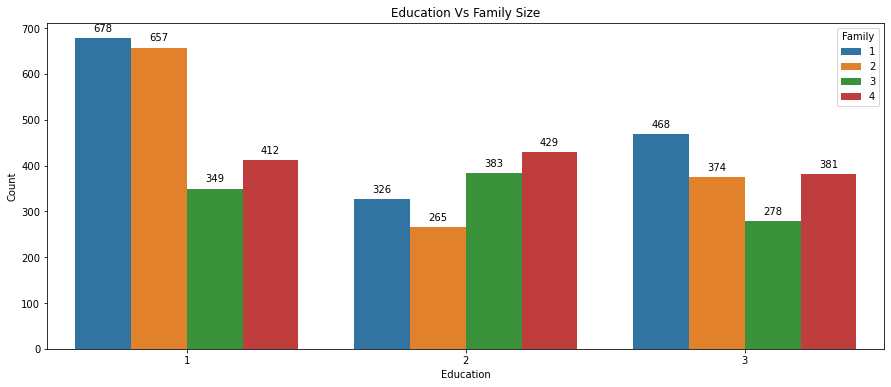

In [39]:
# plotting Education Vs Family sizes
plt.figure(figsize=(15,6))                                             # setting the figure size
ax = sns.countplot(x="Education",data=cust_df, hue='Family')
plt.title('Education Vs Family Size')
plt.xlabel('Education')
plt.ylabel('Count')
#ax.legend(['Declined Personal Loan', 'Accepted Personal Loan'],loc='upper center')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                      va = 'center', xytext = (0, 10), textcoords = 'offset points')

There are more users with family size 1 & 2 having education level 1. User with education level 3 have the lowest member families 3 & 4.

<p style="color:red;">2.4.5  Analysing Education Vs Personal Loan </p>

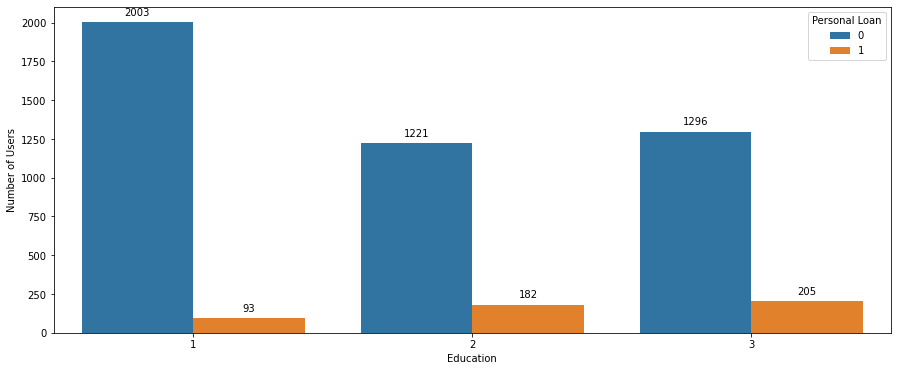

In [40]:
# plotting personal loan approved by Years of Experience/Age ratio
plt.figure(figsize=(15,6))                                             # setting the figure size
ax = sns.countplot(x="Education",data=cust_df, hue='Personal Loan')
plt.xlabel('Education')
plt.ylabel('Number of Users')
#ax.legend(['Declined Personal Loan', 'Accepted Personal Loan'],loc='upper center')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                      va = 'center', xytext = (0, 10), textcoords = 'offset points')

the number of personal loand is in direct correlation with the education level

<p style="color:red;">2.4.5 Visualization 3D of the Personal Loan </p>

In [41]:
# Selecting data for Logistic regression
cus_cat = cust_df[['ID','Education','Family','cca_inc','mor_inc','exp_age','Personal Loan',
                   'Securities Account','CD Account','Online','CreditCard']]
cus_cat_pl = cus_cat[cus_cat['Personal Loan']==1]
cus_cat_npl = cus_cat[cus_cat['Personal Loan']==0]

In [42]:
# final dataframe for plotting 3D sequency
cus_chart = cus_cat_pl.set_index('ID').sort_values(by=['cca_inc'])

<Figure size 432x288 with 0 Axes>

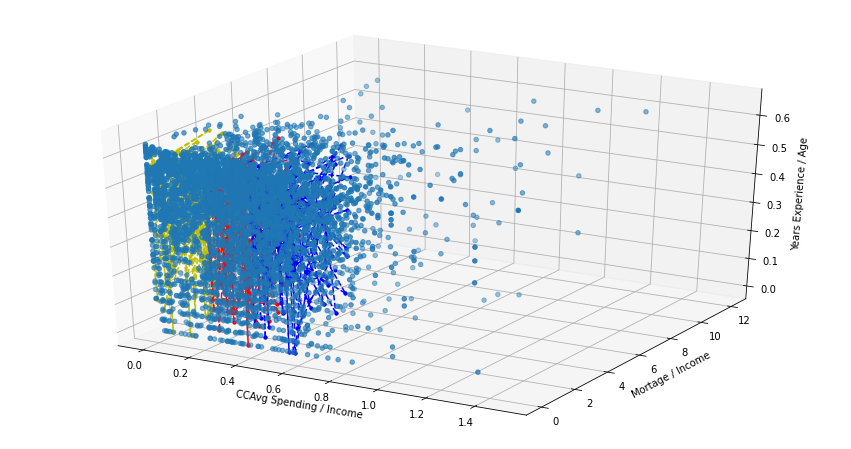

In [43]:
pln = cus_chart.shape[0]
m=0
n=150
p=300
q=pln

fig = plt.figure()
ax = plt.figure(figsize=(15,8)).gca(projection='3d')

x=cus_cat_npl['cca_inc']
y=cus_cat_npl['mor_inc']
z=cus_cat_npl['exp_age']

ax.scatter(x, y, z)

for i in range(m,n):
   # print(i)
    m = 1+m
    if m < n:
        pxij = [cus_chart['cca_inc'].iloc[i],cus_chart['cca_inc'].iloc[m]]
        pyij = [cus_chart['mor_inc'].iloc[i],cus_chart['mor_inc'].iloc[m]]
        pzij = [cus_chart['exp_age'].iloc[i],cus_chart['exp_age'].iloc[m]]
        ax.plot(pxij, pyij, pzij, "y.--")
        #print(m)

for i in range(n,p):
    #print(i)
    m = 1+m
    if m < p:
        pxij = [cus_chart['cca_inc'].iloc[i],cus_chart['cca_inc'].iloc[m]]
        pyij = [cus_chart['mor_inc'].iloc[i],cus_chart['mor_inc'].iloc[m]]
        pzij = [cus_chart['exp_age'].iloc[i],cus_chart['exp_age'].iloc[m]]
        ax.plot(pxij, pyij, pzij, "r.--")
      #  print(m)
        
for i in range(p,q):
    #print(i)
    m = 1+m
    if m < q:
        pxij = [cus_chart['cca_inc'].iloc[i],cus_chart['cca_inc'].iloc[m]]
        pyij = [cus_chart['mor_inc'].iloc[i],cus_chart['mor_inc'].iloc[m]]
        pzij = [cus_chart['exp_age'].iloc[i],cus_chart['exp_age'].iloc[m]]
        ax.plot(pxij, pyij, pzij, "b.--")
       # print(m)
        
ax.set_xlabel('CCAvg Spending / Income')
ax.set_ylabel('Mortage / Income')
ax.set_zlabel('Years Experience / Age')
ax.grid()

plt.show()


In [44]:
round(cust_df.groupby('Personal Loan').mean(),3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,ZIP,exp_age,exp_age_tab,cca_inc,cca_inc_tab,mor_inc,mor_inc_int
Personal Loan,,,,,,,,,,,,,,,,,,,,
0,2512.165,45.367,20.165,66.237,93152.429,2.373,20.748,1.844,51.789,0.102,0.036,0.596,0.294,93170.960,0.405,0.406,0.332,0.332,1.008,0.858
1,2390.650,45.067,19.844,144.746,93153.202,2.612,46.864,2.233,100.846,0.125,0.292,0.606,0.298,93153.202,0.399,0.397,0.333,0.332,0.689,0.515


data shows a preference for users to get a personal loan when having a higher Income, mortgage and Education.

<p style="color:blue;">2.5 Getting Data model ready </p>

In [45]:
# Selecting data for modeling
data_m = cust_df[['Age','Experience','Family','Education','Income','Mortgage','CCAvg', 'Securities Account',
       'CD Account', 'Online', 'CreditCard','Personal Loan']]
data_m.head()

,Age,Experience,Family,Education,Income,Mortgage,CCAvg,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,4,1,49,0,19.2,1,0,0,0,0
1,45,19,3,1,34,0,18.0,1,0,0,0,0
2,39,15,1,1,11,0,12.0,0,0,0,0,0
3,35,9,1,2,100,0,32.4,0,0,0,0,0
4,35,8,4,2,45,0,12.0,0,0,0,1,0


<p style="color:red;">2.5.1 Getting Dummies Variables </p>

In [46]:
# Getting dummies variables
data_m = pd.get_dummies(data_m, columns=['Family', 'Education'])

In [47]:
data_m.head()

,Age,Experience,Income,Mortgage,CCAvg,Securities Account,CD Account,Online,CreditCard,Personal Loan,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,25,1,49,0,19.2,1,0,0,0,0,0,0,0,1,1,0,0
1,45,19,34,0,18.0,1,0,0,0,0,0,0,1,0,1,0,0
2,39,15,11,0,12.0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,9,100,0,32.4,0,0,0,0,0,1,0,0,0,0,1,0
4,35,8,45,0,12.0,0,0,0,1,0,0,0,0,1,0,1,0


<p style="color:red;">2.5.2 Dropping features </p>

In [48]:
# Dropping Family_1 & Education_1 (it will be considerated as all zeros in the input data)
data_m = data_m.drop(columns=['Family_1','Education_1'])
data_m.head()

,Age,Experience,Income,Mortgage,CCAvg,Securities Account,CD Account,Online,CreditCard,Personal Loan,Family_2,Family_3,Family_4,Education_2,Education_3
0,25,1,49,0,19.2,1,0,0,0,0,0,0,1,0,0
1,45,19,34,0,18.0,1,0,0,0,0,0,1,0,0,0
2,39,15,11,0,12.0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,0,32.4,0,0,0,0,0,0,0,0,1,0
4,35,8,45,0,12.0,0,0,0,1,0,0,0,1,1,0


# 3.0.- Split the data into training and test set in the ratio of 70:30 respectively

In [49]:
# splitting independent and depended variables
X = data_m.drop(columns=['Personal Loan'])
y = data_m['Personal Loan']
print(data_m.shape, X.shape, y.shape)

(5000, 15) (5000, 14) (5000,)


In [50]:
#Splitting the X, y data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size= 0.3, random_state = 0)

In [51]:
# checking splitting data 70:30
print("{0:0.2f}% data is in training set".format((len(X_train)/len(data_m.index)) * 100), '- total of', len(X_train))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(data_m.index)) * 100),'- total of', len(X_test))

70.00% data is in training set - total of 3500
30.00% data is in test set - total of 1500


In [52]:
# Checking proportional distribution of train and test data
print("Total Per. Loan Approved      : {0} ({1:0.2f}%)".format(len(data_m.loc[data_m['Personal Loan'] == 1]), (len(data_m.loc[data_m['Personal Loan'] == 1])/len(data_m.index)) * 100))
print("Total Per. Loan No Approved   : {0} ({1:0.2f}%)".format(len(data_m.loc[data_m['Personal Loan'] == 0]), (len(data_m.loc[data_m['Personal Loan'] == 0])/len(data_m.index)) * 100))
print("")
print("Training Per. Loan Approved   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Per. Loan No Approved: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Per. Loan Approved       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Per. Loan No Approved    : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Total Per. Loan Approved      : 480 (9.60%)
Total Per. Loan No Approved   : 4520 (90.40%)

Training Per. Loan Approved   : 352 (10.06%)
Training Per. Loan No Approved: 3148 (89.94%)

Test Per. Loan Approved       : 128 (8.53%)
Test Per. Loan No Approved    : 1372 (91.47%)



# 4.-  Use Logistic Regression model to predict the number of a customers buying personal loans

In [53]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)
# function coeficients
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

         0         1         2         3         4         5         6  \
0 -0.36565  0.362882  0.055079  0.001128  0.018585 -0.548783  3.030523   

         7         8         9       10        11        12        13  \
0 -0.75226 -0.783818 -0.326676  1.63114  1.142187  3.627384  3.765074   

   intercept  
0  -2.176254  


In [54]:
X.columns

Index(['Age', 'Experience', 'Income', 'Mortgage', 'CCAvg',
       'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Family_2',
       'Family_3', 'Family_4', 'Education_2', 'Education_3'],
      dtype='object')

In [55]:
#score the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
#print(model.score(X_test, y_test))
print ('Model Score :',round(metrics.accuracy_score(y_test,y_predict),2))

Model Score : 0.96


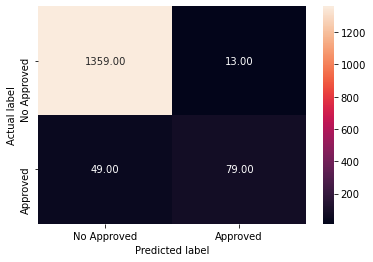

In [56]:
# confusion metrics
confusion=confusion_matrix(y_test, y_predict)
sns.heatmap(confusion, annot=True,  fmt='.2f', xticklabels = ["No Approved", "Approved"] , yticklabels = ["No Approved", "Approved"] )
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [57]:
#The confusion matrix
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[1,0]
FN = confusion[0,1]
print('Model predict Positive correctly (TP):', TP)
print('Model predict Negative correctly (TN):', TN)
print('Model predict False Positve (FP):', FP)
print('Model predict False Negative (FN):', FN)

Model predict Positive correctly (TP): 79
Model predict Negative correctly (TN): 1359
Model predict False Positve (FP): 49
Model predict False Negative (FN): 13


In [58]:
print('Sensitivity or Recall :',round(TP/float(TP+FN),2))
print('Specificity :',round(TN/float(TN+FP),2))
print('False Positive :',round(FP/float(TN+FP),2))
print('Presicion :',round(TP/float(TP+FP),2))
print('Accuracy :',round((TP+TN)/float(TP+TN+FP+FN),2))

Sensitivity or Recall : 0.86
Specificity : 0.97
False Positive : 0.03
Presicion : 0.62
Accuracy : 0.96


In [59]:
# clasification report
from sklearn.metrics import classification_report
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1408
           1       0.62      0.86      0.72        92

    accuracy                           0.96      1500
   macro avg       0.80      0.91      0.85      1500
weighted avg       0.97      0.96      0.96      1500



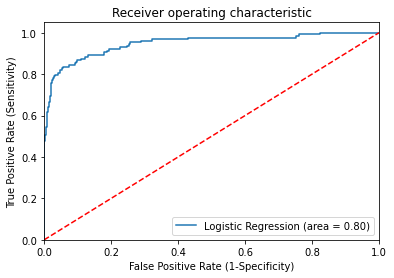

In [60]:
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<p style="color:blue;">4.1 Build a Logistic Regression function for further analysis </p>

In [61]:
def logics_regression (X_train, X_test, y_train, y_test):
    # evaluating P values
    logit = sm.Logit( y_train, sm.add_constant( X_train ) )
    lg = logit.fit()
    print('\n' * 1)
    print(lg.summary2())
    model = LogisticRegression(solver="liblinear")
    model.fit(X_train, y_train)
    #predict on test
    y_predict = model.predict(X_test)                                                
    #score the model
    print('\n' * 1)
    print('Model score :',round(model.score(X_test, y_test),2))
    print('\n' * 1)
    # confusion metrics
    confusion=confusion_matrix(y_test, y_predict)
    sns.heatmap(confusion, annot=True,  fmt='.2f', xticklabels = ["No Approved", "Approved"] , yticklabels = ["No Approved", "Approved"] )
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    # Metric data
    print('\n' * 1)
    TP = confusion[1,1]
    TN = confusion[0,0]
    FP = confusion[1,0]
    FN = confusion[0,1]
    print('Model predict Positive correctly (TP):', TP)
    print('Model predict Negative correctly (TN):', TN)
    print('Model predict False Positve (FP):', FP)
    print('Model predict False Negative (FN):', FN)
    print('\n' * 1)
    print('Sensitivity or Recall :',round(TP/float(TP+FN),2))
    print('Specificity :',round(TN/float(TN+FP),2))
    print('False Positive :',round(FP/float(TN+FP),2))
    print('Presicion :',round(TP/float(TP+FP),2))
    print('Accuracy :',round((TP+TN)/float(TP+TN+FP+FN),2))
    # clasification report
    print('\n' * 1)
    print(classification_report(y_predict, y_test))
   # ROC Curve
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

# 5.0.- Give your reasoning on how can the model perform better?

<p style="color:blue;">5.1 Case #1.- Modeling with P-values below 0.05 </p>

In [62]:
# evaluating P values
import statsmodels.api as sm
logit = sm.Logit( y_train, sm.add_constant( X_train ) )
lg = logit.fit()
lg.summary2()

Optimization terminated successfully.
         Current function value: 0.111367
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:                 Logit             Pseudo R-squared:  0.659   
Dependent Variable:    Personal Loan     AIC:               809.5699
Date:                  2020-07-27 21:45  BIC:               901.9777
No. Observations:      3500              Log-Likelihood:    -389.78 
Df Model:              14                LL-Null:           -1142.2 
Df Residuals:          3485              LLR p-value:       0.0000  
Converged:             1.0000            Scale:             1.0000  
No. Iterations:        10.0000                                      
--------------------------------------------------------------------
                    Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
--------------------------------------------------------------------
const              -12.3562   2.1751 -5.6808 0.0000 -16.6192 -8.0932
Age                 -0.0428   0.0798 -0.5355 0.5923  -0.1992  0.1137
Experience           0.0454   0.0795  0.5703 0.5685  -0.1105  0.2013
Income               0.0640   0.0038 16.6203 0.0000   0.0564  0.0715
Mortgage             0.0012   0.0008  1.5820 0.1136  -0.0003  0.0027
CCAvg                0.0231   0.0048  4.8046 0.0000   0.0137  0.0326
Securities Account  -0.7479   0.3577 -2.0910 0.0365  -1.4490 -0.0469
CD Account           3.7096   0.4176  8.8823 0.0000   2.8911  4.5282
Online              -0.8599   0.2033 -4.2290 0.0000  -1.2585 -0.4614
CreditCard          -0.9197   0.2553 -3.6024 0.0003  -1.4201 -0.4193
Family_2            -0.1994   0.2832 -0.7042 0.4813  -0.7545  0.3556
Family_3             1.9820   0.3027  6.5476 0.0000   1.3887  2.5753
Family_4             1.3882   0.2870  4.8366 0.0000   0.8257  1.9507
Education_2          4.4885   0.3528 12.7240 0.0000   3.7971  5.1799
Education_3          4.5572   0.3474 13.1164 0.0000   3.8762  5.2382
====================================================================

"""

<p style="color:red;">5.1.1 Case #1.1.- Dropping variables with P-values below 0.05 </p>

variables reduce from : 14 to 10


Optimization terminated successfully.
         Current function value: 0.107772
         Iterations 10


                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.656      
Dependent Variable:   Personal Loan     AIC:               776.4071   
Date:                 2020-07-27 21:45  BIC:               844.1728   
No. Observations:     3500              Log-Likelihood:    -377.20    
Df Model:             10                LL-Null:           -1095.5    
Df Residuals:         3489              LLR p-value:       1.2949e-302
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       10.0000                                         
----------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------
const              -13.2371   0.7014

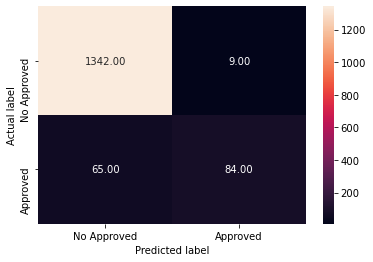



Model predict Positive correctly (TP): 84
Model predict Negative correctly (TN): 1342
Model predict False Positve (FP): 65
Model predict False Negative (FN): 9


Sensitivity or Recall : 0.9
Specificity : 0.95
False Positive : 0.05
Presicion : 0.56
Accuracy : 0.95


              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1407
           1       0.56      0.90      0.69        93

    accuracy                           0.95      1500
   macro avg       0.78      0.93      0.83      1500
weighted avg       0.97      0.95      0.96      1500



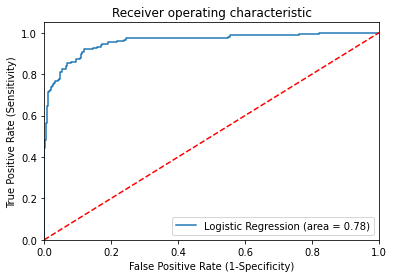

In [63]:
# Dropping features > 0.05 (drop: Age, Experience,Mortage,Family_2)
X1 = X.drop(columns=['Age','Experience','Mortgage','Family_2'])
y1 = y
print('variables reduce from :', X.shape[1], 'to', X1.shape[1])
print('\n' * 1)
X_train, X_test, y_train, y_test = train_test_split( X1, y1, test_size= 0.3, random_state = 1)
#Calling the logics regression function
logics_regression(X_train, X_test, y_train, y_test)

<p style="color:blue;">5.2 Case #2.- Applying SMOTE (Synthetic Minority Oversampling Technique) for Handling Imbalanced Datasets </p>

In [64]:
# Using the initial set of variables X & y
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, ADASYN

ms = SMOTE(random_state=0)
X_train, X_test3, y_train, y_test3 = train_test_split(X, y, test_size=0.3, random_state=0)
X_res, y_res = ms.fit_sample(X_train, y_train)

In [65]:
X_train.shape

(3500, 14)

In [66]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(X_res))
print("Number of no Personal Loan in oversampled data",len(y_res[y_res==0]))
print("Number of Personal Loan",len(y_res[y_res==1]))
print("Proportion of no subscription data in oversampled data is ",len(y_res[y_res==0])/len(X_res))
print("Proportion of subscription data in oversampled data is ",len(y_res[y_res==1])/len(X_res))

length of oversampled data is  6296
Number of no Personal Loan in oversampled data 3148
Number of Personal Loan 3148
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


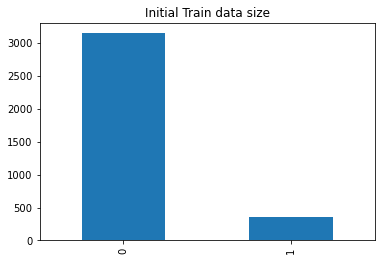

In [67]:
# initial train data size
ini = pd.Series(y_train).value_counts().plot.bar();
plt.title('Initial Train data size');

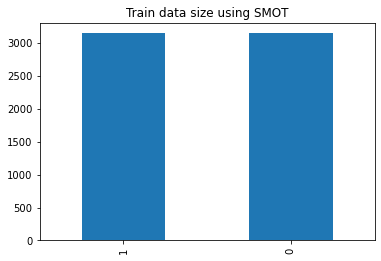

In [68]:
# observe that data has been balanced
pd.Series(y_res).value_counts().plot.bar()
plt.title('Train data size using SMOT');

variables reduce from : 14 to 14


Optimization terminated successfully.
         Current function value: 0.247210
         Iterations 8


                          Results: Logit
Model:               Logit             Pseudo R-squared:  0.643    
Dependent Variable:  Personal Loan     AIC:               3142.8638
Date:                2020-07-27 21:45  BIC:               3244.0789
No. Observations:    6296              Log-Likelihood:    -1556.4  
Df Model:            14                LL-Null:           -4364.1  
Df Residuals:        6281              LLR p-value:       0.0000   
Converged:           1.0000            Scale:             1.0000   
No. Iterations:      8.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const              -5.9311   1.0725  -5.5302 0.0000 -8.0331 -3.8290
Age 

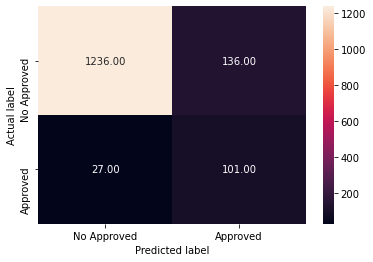



Model predict Positive correctly (TP): 101
Model predict Negative correctly (TN): 1236
Model predict False Positve (FP): 27
Model predict False Negative (FN): 136


Sensitivity or Recall : 0.43
Specificity : 0.98
False Positive : 0.02
Presicion : 0.79
Accuracy : 0.89


              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1263
           1       0.79      0.43      0.55       237

    accuracy                           0.89      1500
   macro avg       0.84      0.70      0.75      1500
weighted avg       0.88      0.89      0.88      1500



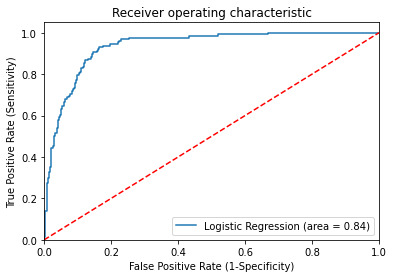

In [69]:
X_train = X_res      # variables for the function: logistic regression
y_train = y_res      # variables for the function: logistic regression

print('variables reduce from :', X.shape[1], 'to', X_train.shape[1])
print('\n' * 1)

#Calling the logics regression function
logics_regression(X_train, X_test3, y_train, y_test3)

<p style="color:red;">5.2.1 Case #2.1.- Dropping variables with P-values higher than  0.05 </p>

variables reduce from : 14 to 11


Optimization terminated successfully.
         Current function value: 0.263101
         Iterations 8


                          Results: Logit
Model:               Logit             Pseudo R-squared:  0.620    
Dependent Variable:  Personal Loan     AIC:               3336.9721
Date:                2020-07-27 21:45  BIC:               3417.9441
No. Observations:    6296              Log-Likelihood:    -1656.5  
Df Model:            11                LL-Null:           -4364.1  
Df Residuals:        6284              LLR p-value:       0.0000   
Converged:           1.0000            Scale:             1.0000   
No. Iterations:      8.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const              -4.4304   0.1846 -23.9999 0.0000 -4.7922 -4.0686
Inco

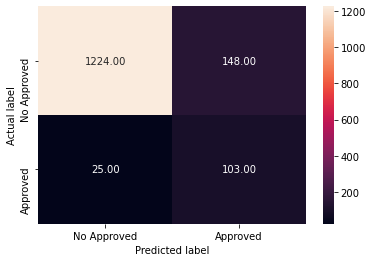



Model predict Positive correctly (TP): 103
Model predict Negative correctly (TN): 1224
Model predict False Positve (FP): 25
Model predict False Negative (FN): 148


Sensitivity or Recall : 0.41
Specificity : 0.98
False Positive : 0.02
Presicion : 0.8
Accuracy : 0.88


              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1249
           1       0.80      0.41      0.54       251

    accuracy                           0.88      1500
   macro avg       0.85      0.70      0.74      1500
weighted avg       0.88      0.88      0.87      1500



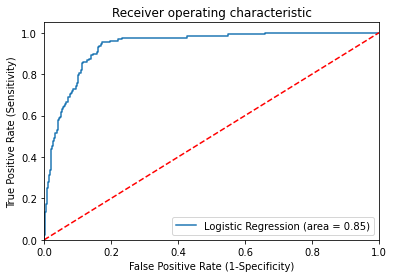

In [70]:
X31 = X.drop(columns =['Age','Experience','Mortgage'])
y31 = y

X_train, X_test31, y_train, y_test31 = train_test_split(X31, y31, test_size=0.3, random_state=0)
columns = X_train.columns
X_res2, y_res2 = ms.fit_sample(X_train, y_train)

X_train = X_res2     # variables for the function: logistic regression
y_train = y_res2     # variables for the function: logistic regression

print('variables reduce from :', X.shape[1], 'to', X_train.shape[1])
print('\n' * 1)

#Calling the logics regression function
logics_regression(X_train, X_test31, y_train, y_test31)

<p style="color:red;">5.2.1 Case #2.1.- Testing Logistic Model & Histogram </p>

In [71]:
logit = sm.Logit( y_train, sm.add_constant( X_train ) )
lg = logit.fit()
lg.summary2()

y_pred_df = pd.DataFrame()

y_pred_df['actual'] = y_test31

y_pred_df["predicted_prob"] = lg.predict( sm.add_constant( X_test31 ) )
## Used statsmodel logit function to predict probaility of output being from class '1'

y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.85 else 0)
# Converted values which are above 0.84 as '1' and rest as '0'.
## Therefore thershold here is 0.84 as values at and above 0.84 probability is converted to '1'

y_pred_df[0:5]

Optimization terminated successfully.
         Current function value: 0.263101
         Iterations 8


,actual,predicted_prob,predicted
398,0,0.002732,0
3833,0,0.118429,0
4836,0,0.064513,0
4572,0,0.131293,0
636,0,0.211668,0


In [72]:
print('User with approved personal loan between the test group :',y_pred_df.reset_index().actual.sum())
print('User with approved personal loan by the last logistic model :',y_pred_df.reset_index().predicted.sum())

User with approved personal loan between the test group : 128
User with approved personal loan by the last logistic model : 128


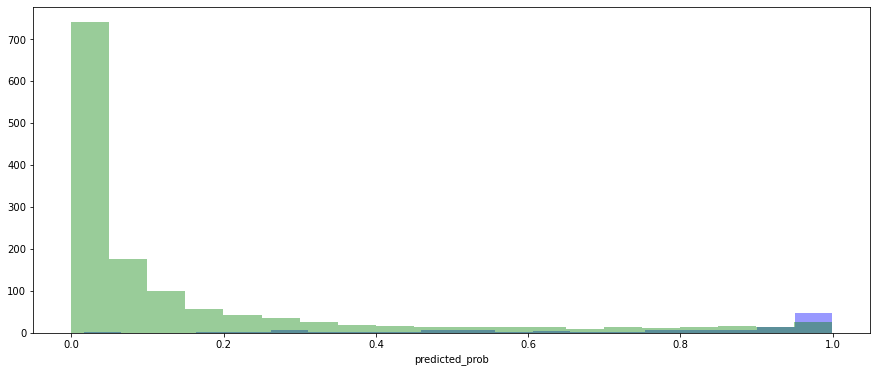

In [73]:
plt.figure(figsize=(15,6))       
sns.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], kde=False, color = 'b',bins=20 )
sns.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], kde=False, color = 'g' ,bins=20)
plt.show()

# 6.0.- Give Business understanding of your model? 

- Different scenarios were analyzed
  - case 1: Using the initial variables
  - case 2: Using the Synthetic Minority Oversampling Technique (SMOT)
  
- All the scenarios suggest no to consider (or to drop) using P>0.05: 
  - case 1: Age, Experience, Mortgage, and Family_2
  - case 2: Age, Experience, and Mortgage
  
- Binary Classification:
  - case 1: TP:  84, TN: 1342, FP:  65, FN: 9
  - case 2: TP: 103, TN: 1224, FP:  25, FN: 148

- Metrics: 
  - Sensitivity measures the proportion of actual positives personal loans that are correctly identified by the model
  - Specificity measures the proportion of actual negatives personal loans that are correctly identified by the model
  - False positive is when you incorrectly reject the null hypothesis
  - precision expresses the proportion of the data points our model says was relevant actually were relevant.
  - F1 score or F-measure is a measure of a test's accuracy.
  - Accuracy is the percentage of points that have been correctly classified.
-
  - case 1: Sensitivity: 0.90, Specificity: 0.95, False Positive: 0.05, Presicion : 0.56, F1:0.69, Accuracy : 0.95
  - case 2: Sensitivity: 0.41 ,Specificity: 0.98, False Positive: 0.02, Presicion : 0.80, F1:0.54, Accuracy : 0.88
  
- Area under the Curve (AUC) after dropping variable with P>0.05
  - case 1: 0.78
  - case 2: 0.85 (best scenario)
- Conclusion :
  - for classification it is not necesary to know the Age, Experience, and Mortgage information
  - Model using SMOT gives a better result. Accuracy had reduced but model had improved.
  